In [1]:
import os 
import glob
import numpy as np
import pandas as pd
import importlib as imp

from tqdm import tqdm, tqdm_notebook
import warnings
warnings.simplefilter('ignore')
pd.options.display.max_columns = 100

*Ваша третья лабораторная работа будет заключаться в реализации и сравнении алгоритмов для решения quadratic assignment problem. Вам нужно будет реализовать следующие алгоритмы, которые мы разбирали на паре:*

**1) Local search - сделать 2 opt либо с best-improvement либо first-improvement + don't look bits<br>
2) Iterated local search - можно использовать stochastic 2-opt <br>
3) Guided local search  - можно использовать stochastic 2-opt <br>**

Реализовать можно на любом языке. Также нужно будет сравнить время работы алгоритма, а так же показать лучшее решение каждого алгоритма, которое удалось найти вам.

---

<i>**Данные:**

Данные для работы прикрепил архивом к письму. Структура такая: <br>
n - количество заводов и мест <br>
следующие n строчек - матрица расстояний D <br>
пустая строчка <br>
следующие n строчек - матрица потока F</i>

---

Форма отчетности: <br>

Вы присылаете мне код алгоритмов и небольшой отчет. Пожалуйста прикрепляте код в отдельном исполняймом файле, не засовывайте в отчет. Работать можно в группах не более 3-х человек. В отчете должны быть таблички со скоростью и для конкретного алгоритма на конкретном наборе данных + ответ каждого алгоритма.

**Важно:** сделайте так же файлики с ответами. Имя файлика - Tai20a.sol, Tai40a.sol  и т.п. Формат файлика с ответами:

14 13 5... - значит завод 14 помещаем на 1 локацию, 13 на 2, 5 на 3 и т.п. Разделитель пробел.

In [2]:
from utils import tools
tools = imp.reload(tools)

In [3]:
benchmarks = glob.glob('data/*')
benchmarks

['data\\tai100a',
 'data\\tai20a',
 'data\\tai40a',
 'data\\tai60a',
 'data\\tai80a']

In [290]:
# from algorithm import local_search, iterated_local_search, guided_local_search
tools   = imp.reload(tools)
problem = tools.get_problem_dct(benchmarks[3])
# print(problem)
print('{} items'.format(problem['n']))

solution = np.arange(problem['n'])
solution = np.random.permutation(solution)
cur_cost = tools.compute_solution(problem, solution)
print('Start cost {}'.format(cur_cost))

60 items
Start cost 8465466


In [291]:
%%time
local_search = imp.reload(local_search)

params = dict(solution=solution,
              method='first-improvement',
              n_iter=100,
              verbose=True)
alg = local_search.LocalSearch(problem)
alg.set_params(params)
_ = alg.solve()

Start cost 8465466


 60%|██████████████████████████████████████████████▊                               | 60/100 [00:04<00:04,  9.44it/s]

No better solutions, stoping...
End cost 7771362
Wall time: 4.45 s


Start cost: 8465466


100%|███████████████████████████████████████████████████████████████████████████████| 50/50 [04:34<00:00,  5.81s/it]


End cost: 7722414


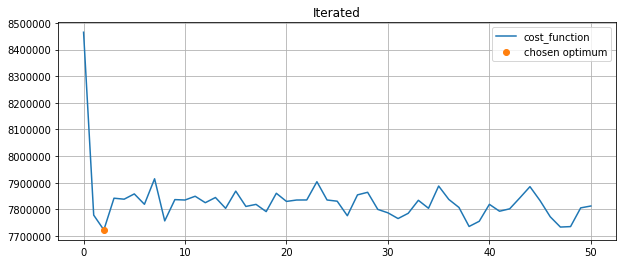

Wall time: 4min 39s


In [292]:
%%time
iterated_local_search = imp.reload(iterated_local_search)
params = dict(solution=solution,
              method='first-improvement',
              n_iter_ls=100,
              n_iter=50,
              verbose=True)
alg = iterated_local_search.Iterated(problem)
alg.set_params(params)
alg.refresh_params()
_ = alg.solve()
history = alg.get_history()

 17%|█████████████                                                                 | 25/150 [00:43<05:25,  2.60s/it]

No better solutions, stoping...
End cost: 7609338


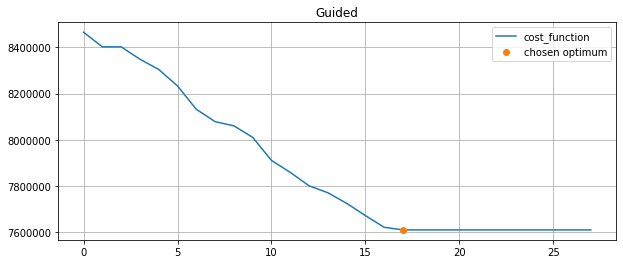

[1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 2 0 1 0 1 0 0 0 2 0 0 0 2
 0 1 0 0 2 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1]
Wall time: 46.8 s


In [293]:
%%time
guided_local_search = imp.reload(guided_local_search)
params = dict(solution=solution,
              method='first-improvement',
              n_iter=5,
              n_epoch=150,
              mu=0.0007,
              patience=10,
              verbose=True)
alg = guided_local_search.Guided(problem)
alg.set_params(params)
alg.refresh_params()
_ = alg.solve()
history = alg.get_history()
print(alg.penalty.sum(axis=0))

In [295]:
# problem